# EXERCISE 6

## 1. Mixture of Gaussians

(1) Define the parameters of 3 Gaussian distribution functions in two dimensions.

In [2]:
# imports needed for Exercise 6
import numpy as np
import math as m
import random
import matplotlib.pyplot as plt

In [3]:
import panda as pd

In [4]:
def bivariate_gauss(x, mu, covarianzmatrix):
    a = (1/(m.sqrt((2* m.pi)**2)) * np.linalg.det(covarianzmatrix))
    b = (m.e ** (np.matmul(np.matmul(-0.5*np.transpose(x-mu), np.linalg.inv(covarianzmatrix)),  x-mu)))
    return a * b

bivariate_gauss(np.array([[100],[100]]), np.array([[2],[2]]), np.array([[1, 0],[0, 1]]))


array([[0.]])

In [83]:
gauss_1 = np.random.multivariate_normal([6,6],[[1,0],[0,1]],100)
gauss_2 = np.random.multivariate_normal([3.5,-1],[[0.1,0],[0,3]],100)
gauss_3 = np.random.multivariate_normal([1,4],[[0.9,0],[0,0.2]],100)
gauss_com = np.concatenate((gauss_1,gauss_2, gauss_3),axis=0)


In [84]:
len(gauss_com)

300

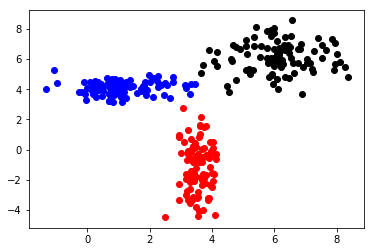

In [25]:
gauss_1_x = gauss_1[:,0]
gauss_1_y = gauss_1[:,1]
gauss_2_x = gauss_2[:,0]
gauss_2_y = gauss_2[:,1]
gauss_3_x = gauss_3[:,0]
gauss_3_y = gauss_3[:,1]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(gauss_1_x, gauss_1_y, c="black")
ax.scatter(gauss_2_x, gauss_2_y, c="red")
ax.scatter(gauss_3_x, gauss_3_y, c="blue")
plt.show()

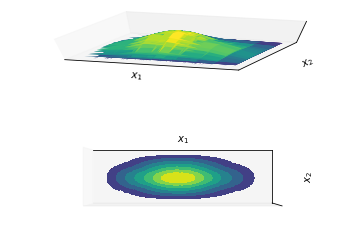

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = gauss_1[:,0]
Y = gauss_1[:,1]
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([3., 4.])
Sigma = np.array([[ 1. , 0.], [0.,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()

In [27]:
# Calculate the probability of a point with the following
multivariate_gaussian(np.array([3.5,-1]), np.array([3.5,-1]), np.array([[0.1,0],[0,3]]))

0.2905758415662736

In [40]:
#mue, covariance, pi
def initial():
    return [np.random.rand(2), np.array([[1,0],[0,1]]), np.random.rand(1)]

In [75]:
def e_step(dist_1, dist_2, dist_3, X):
    Xs = [[dist_1[2] * multivariate_gaussian(x, dist_1[0], dist_1[1]), 
           dist_2[2] * multivariate_gaussian(x, dist_2[0], dist_2[1]), 
           dist_3[2] * multivariate_gaussian(x, dist_3[0], dist_3[1])] for x in X]
    return [[xs[0]/sum(xs), xs[1]/sum(xs), xs[2]/sum(xs)] for xs in Xs]
    

In [85]:
e_step(initial(),initial(),initial(), gauss_com)

[[array([0.0007697]), array([0.99868548]), array([0.00054482])],
 [array([0.00188474]), array([0.99646859]), array([0.00164666])],
 [array([0.00500201]), array([0.99155197]), array([0.00344602])],
 [array([0.00314831]), array([0.9941454]), array([0.00270629])],
 [array([0.00226679]), array([0.9961562]), array([0.00157702])],
 [array([0.00272834]), array([0.99582555]), array([0.00144611])],
 [array([0.00606557]), array([0.99093284]), array([0.00300159])],
 [array([0.00068611]), array([0.99895943]), array([0.00035446])],
 [array([0.01022713]), array([0.98612374]), array([0.00364913])],
 [array([0.00289498]), array([0.99520366]), array([0.00190136])],
 [array([0.00533137]), array([0.99225611]), array([0.00241252])],
 [array([0.00181003]), array([0.99739542]), array([0.00079455])],
 [array([0.00226237]), array([0.99624744]), array([0.00149019])],
 [array([0.00216442]), array([0.99633565]), array([0.00149994])],
 [array([0.00371878]), array([0.99449798]), array([0.00178325])],
 [array([0.00

In [65]:
def bla_step(mue_1, cov_1, pi_1, mue_2, cov_2, pi_2, mue_3, cov_3, pi_3):
    return mue_1, cov_1, pi_1, mue_2, cov_2, pi_2, mue_3, cov_3, pi_3

In [74]:
bla_step(*initial(),initial())

SyntaxError: only named arguments may follow *expression (<ipython-input-74-beb3acf15e2a>, line 1)